<a href="https://colab.research.google.com/github/JonathanRibeiro92/RNN_disciplina/blob/main/atividade_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from tensorflow.keras.datasets import reuters
import tensorflow as tf

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer

import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
(XTr, YTr),(XTe, YTe) = reuters.load_data(num_words=None, test_split=0.3)

print('XTr Shape = ',  XTr.shape)
print('YTr Shape = ',  YTr.shape)
print('XTe Shape = ',  XTe.shape)
print('YTe Shape = ',  YTe.shape)

XTr Shape =  (7859,)
YTr Shape =  (7859,)
XTe Shape =  (3369,)
YTe Shape =  (3369,)


In [26]:
#Tokenização

MaxWords = 10000
WordIndex = reuters.get_word_index(path="reuters_word_index.json")


Tok = Tokenizer(num_words=MaxWords)
XTr = Tok.sequences_to_matrix(XTr, mode='binary')
XTe = Tok.sequences_to_matrix(XTe, mode='binary')

NumClasses = max(YTr) + 1
YTr = to_categorical(YTr, NumClasses)
YTe = to_categorical(YTe, NumClasses)


print(XTr[1])
print(len(XTr[1]))

[0. 1. 0. ... 0. 0. 0.]
10000


In [27]:
#Construir classificador sequencial

model = Sequential()
model.add(Dense(512, input_shape=(MaxWords,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NumClasses))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               5120512   
                                                                 
 activation_6 (Activation)   (None, 512)               0         
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 46)                23598     
                                                                 
 activation_7 (Activation)   (None, 46)                0         
                                                                 
Total params: 5,144,110
Trainable params: 5,144,110
Non-trainable params: 0
_________________________________________________________________


In [33]:
#Treinar o modelo
history = model.fit(XTr, YTr, epochs=10, validation_data=(XTe, YTe), batch_size=64)

Epoch 1/10
123/123 [==============================] - 12s 95ms/step - loss: 0.1703 - accuracy: 0.9557 - val_loss: 0.9408 - val_accuracy: 0.8041
Epoch 2/10
123/123 [==============================] - 12s 95ms/step - loss: 0.1599 - accuracy: 0.9580 - val_loss: 0.9635 - val_accuracy: 0.7993
Epoch 3/10
123/123 [==============================] - 13s 102ms/step - loss: 0.1607 - accuracy: 0.9557 - val_loss: 0.9747 - val_accuracy: 0.8029
Epoch 4/10
123/123 [==============================] - 11s 91ms/step - loss: 0.1510 - accuracy: 0.9588 - val_loss: 0.9921 - val_accuracy: 0.8023
Epoch 5/10
123/123 [==============================] - 10s 83ms/step - loss: 0.1455 - accuracy: 0.9617 - val_loss: 0.9869 - val_accuracy: 0.8053
Epoch 6/10
123/123 [==============================] - 12s 95ms/step - loss: 0.1346 - accuracy: 0.9611 - val_loss: 0.9925 - val_accuracy: 0.8077
Epoch 7/10
123/123 [==============================] - 11s 91ms/step - loss: 0.1328 - accuracy: 0.9606 - val_loss: 1.0224 - val_accuracy

In [34]:
Scores = model.evaluate(XTe, YTe, verbose=1)
print('Test loss:', Scores[0])
print('Test accuracy:', Scores[1])

106/106 [==============================] - 1s 12ms/step - loss: 1.0219 - accuracy: 0.8047
Test loss: 1.021919846534729
Test accuracy: 0.8046898245811462


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


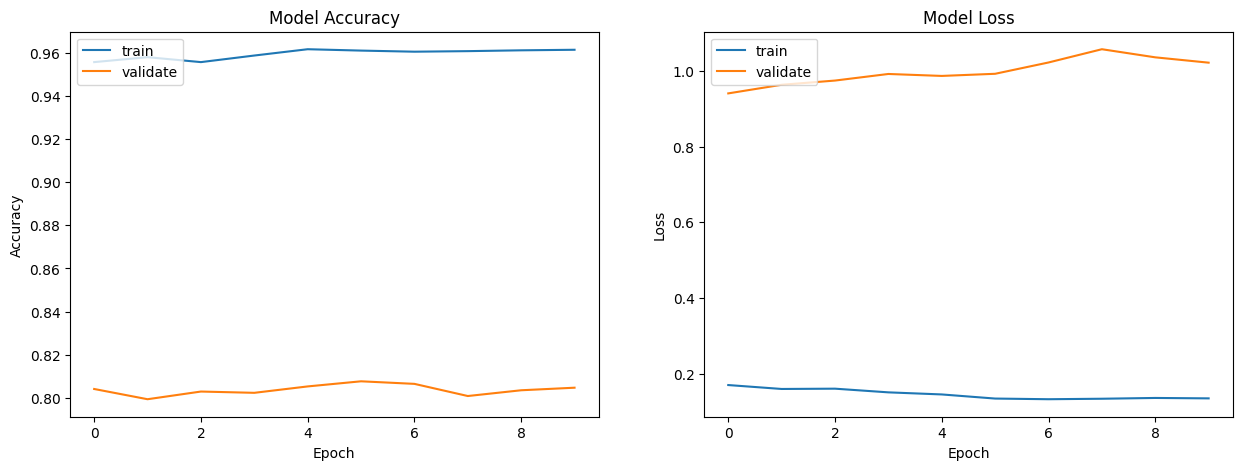

In [36]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 

    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')

    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

print(history.history.keys())

plotmodelhistory(history)